<a href="https://colab.research.google.com/github/KhoiDOO/Practice/blob/main/Natural%20Language%20Processing/5.%20Text_Generation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
print(tf.__version__)
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
import tensorflow.keras.utils as ku 
import numpy as np 

2.6.0


In [ ]:
# sonnets.txt
!gdown --id 108jAePKK4R3BVYBbYJZ32JWUwxeMg20K

data = open('./sonnets.txt').read()

corpus = data.lower().split("\n")

print('\n')
print(corpus[0])
print(corpus[1])

Downloading...
From: https://drive.google.com/uc?id=108jAePKK4R3BVYBbYJZ32JWUwxeMg20K
To: /content/sonnets.txt
100% 93.6k/93.6k [00:00<00:00, 34.8MB/s]


from fairest creatures we desire increase,
that thereby beauty's rose might never die,


In [ ]:
print(corpus[:20])

['from fairest creatures we desire increase,', "that thereby beauty's rose might never die,", 'but as the riper should by time decease,', 'his tender heir might bear his memory:', 'but thou, contracted to thine own bright eyes,', "feed'st thy light'st flame with self-substantial fuel,", 'making a famine where abundance lies,', 'thyself thy foe, to thy sweet self too cruel.', "thou that art now the world's fresh ornament", 'and only herald to the gaudy spring,', 'within thine own bud buriest thy content', 'and, tender churl, makest waste in niggarding.', 'pity the world, or else this glutton be,', "to eat the world's due, by the grave and thee.", 'when forty winters shall beseige thy brow,', "and dig deep trenches in thy beauty's field,", "thy youth's proud livery, so gazed on now,", "will be a tatter'd weed, of small worth held:", "then being ask'd where all thy beauty lies,", 'where all the treasure of thy lusty days,']


In [ ]:
print(len([i for i in corpus]))

2159


In [ ]:
tokenizer = Tokenizer()

tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

# create input sequences using list of tokens
input_sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)


# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
predictors, label = input_sequences[:,:-1],input_sequences[:,-1]

label = ku.to_categorical(label, num_classes=total_words)

In [ ]:
#Check type of predictors and label
print(type(predictors))
print(type(label))

#Check total words
print(total_words)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
3211


In [ ]:
print(predictors[0])

[ 0  0  0  0  0  0  0  0  0 34]


In [ ]:
print(label[0])

[0. 0. 0. ... 0. 0. 0.]


In [ ]:
# Divide train and test dataset
length = len([x for x in predictors])
cut_off = 0.8
split_point = int(length*cut_off)
train, test = predictors[:,:split_point], predictors[:,split_point:]
train_label, test_label = label[:,:split_point], label[:,split_point:]

# Load to dataset
train_dataset = tf.data.Dataset.from_tensor_slices((train, train_label))
test_dataset = tf.data.Dataset.from_tensor_slices((test, test_label))

# Add batch size, shuffle batch
BATCH_SIZE = 64
SHUFFLE_BUFFER_SIZE = 100

train_dataset = train_dataset.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE)
test_dataset = test_dataset.batch(BATCH_SIZE)

In [ ]:
model = Sequential()
model.add(Embedding(total_words, 256, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(512, return_sequences = True)))
model.add(Dropout(0.2))
model.add(LSTM(256, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(128))
model.add(Dense(total_words/2, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(total_words, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 10, 256)           822016    
_________________________________________________________________
bidirectional_1 (Bidirection (None, 10, 1024)          3149824   
_________________________________________________________________
dropout_1 (Dropout)          (None, 10, 1024)          0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 10, 256)           1311744   
_________________________________________________________________
dropout_2 (Dropout)          (None, 10, 256)           0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 128)               197120    
_________________________________________________________________
dense_2 (Dense)              (None, 1605)             

In [ ]:
history = model.fit(predictors, label,  epochs=100)

Epoch 1/100
484/484 [==============================] - 22s 32ms/step - loss: 6.9589 - accuracy: 0.0226
Epoch 2/100
484/484 [==============================] - 15s 32ms/step - loss: 6.5082 - accuracy: 0.0237
Epoch 3/100
484/484 [==============================] - 15s 32ms/step - loss: 6.3556 - accuracy: 0.0272
Epoch 4/100
484/484 [==============================] - 15s 31ms/step - loss: 6.2642 - accuracy: 0.0268
Epoch 5/100
484/484 [==============================] - 15s 31ms/step - loss: 6.1886 - accuracy: 0.0295
Epoch 6/100
484/484 [==============================] - 15s 31ms/step - loss: 6.1369 - accuracy: 0.0310
Epoch 7/100
484/484 [==============================] - 15s 32ms/step - loss: 6.0671 - accuracy: 0.0334
Epoch 8/100
484/484 [==============================] - 15s 31ms/step - loss: 6.0026 - accuracy: 0.0361
Epoch 9/100
484/484 [==============================] - 15s 31ms/step - loss: 5.9412 - accuracy: 0.0374
Epoch 10/100
484/484 [==============================] - 15s 32ms/step - l

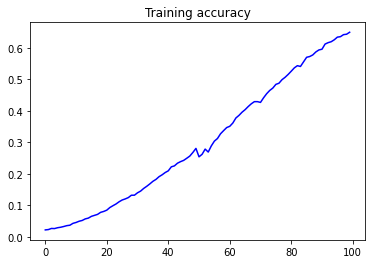

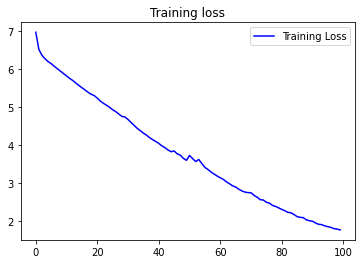

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()

plt.show()

In [ ]:
seed_text = "Missing crush, Quan study harder"
next_words = 30
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = model.predict(token_list, verbose=0)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == np.argmax(predicted,axis=1):
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

Missing crush, Quan study harder art happy and in thine can see ever tend stay that stone holds her for my harmful desire pride well twain dead spent did denied lived stay days praise bearing


In [ ]:
print(len(seed_text))

558


In [ ]:
print(seed_text[:2000])

Help me Obi Wan Kenobi, you're my only hope and toil was unjust lies new despised how in thine be turn'd dateless note see kiss me all her main fears o'er quite debate done ever stay such fire but level of your brow esteem gone wide date hours in bath doth live another part admiring fulfil them do you seem such painting spend clearer cold out of form well spent increase cold o'er glory discloses days ' water cut new cold o'er of woe lies lies kind up your memory hate even so more smell dead of all young away another shape even so more hell but glance all remember men's lie doth dwell in store so bright so near on one hour confined form hour unbless some mother pride so ill day seem wit well more sin new hate on we despise grace evil gone room sense in praise ' meet dead spent took razed esteem'd clearer light confined wrong speaking glory o'er old way spent valley jewel wights did taken dead perceived hate quite perceived 'not there did strive to prove none lies will chide him best pro